### Visualize how factor is applied

In [1]:
import pandas as pd
import numpy as np
import os
from io import StringIO
from functools import reduce

import matplotlib.pyplot as plt

In [2]:
LOGS_DIR = "/home/tomasmizera/school/diploma/src/data/experiments/fp-precomputed-v3/latest/csv/"
LOGS2_DIR = "/home/tomasmizera/school/diploma/src/data/experiments/fp-precomputed-v3continue/latest/csv/"

In [3]:
def _read_text_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
        return reduce(lambda a, b: a+b, lines, '')

def load_files(path_to_files):
    
    files_it = os.scandir(path_to_files)
    files_contents = {}
    
    for file in files_it:
        if file.is_file() and file.name.startswith('fm-'):
            factor = file.name.replace('fm-', '')
            factor = factor.replace('.csv', '')
            files_contents[int(factor)] = _read_text_file(file.path)
        
    return dict(sorted(files_contents.items()))

In [4]:
file_contents = load_files(LOGS_DIR)
file_contents2 = load_files(LOGS2_DIR)

In [5]:
content = {**file_contents, **file_contents2}

In [6]:
# 1. build dataframe from each

dfs = {}

for item in content.items():
    factor = item[0]
    c = StringIO(item[1])
    df = pd.read_csv(c, delimiter=',')
    dfs[factor] = df

In [11]:
def process(df):
    df = df.reset_index(drop=True)
    
    df['difSimple'] = df.originalP - df.simpleSP
    df['difCustom'] = df.originalP - df.customSP
    # normalize to (-1, 1)
    # square
    # subtract
    # squareroot
    # mean of that
    return df.difCustom.mean(), df.difSimple.mean()

def process_arr(dfs):
    data = {}
    for d in dfs.items():
        ix = d[0]
        data[int(ix)] = process(d[1])
    return data


In [10]:
dfs.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 32, 36, 40, 45, 50, 56, 62, 69, 76, 84, 93, 103, 114, 126, 139, 153, 169, 186, 205, 226, 249, 274, 302, 333, 367, 404, 445, 490, 540, 595, 655, 721, 794, 962, 1411, 3031, 1553, 1709, 1880, 2069, 2276, 2504, 2755, 3335, 3669, 4036, 4440, 4885, 5374, 5912, 6504, 7155, 7871, 8659, 9525])

In [12]:
processed = process_arr(dfs)

In [13]:
pdf = pd.DataFrame(processed).T
pdf = pdf.rename({0:'custom', 1:'textrank'}, axis=1)
pdf = pdf.sort_index()
pdf

,custom,textrank
0,-0.005502,-0.005502
1,-0.005289,-0.005502
2,-0.000158,-0.005502
3,-0.001523,-0.005502
4,-0.000571,-0.005502
...,...,...
6504,-0.003525,-0.005502
7155,-0.003525,-0.005502
7871,-0.003525,-0.005502
8659,-0.003525,-0.005502


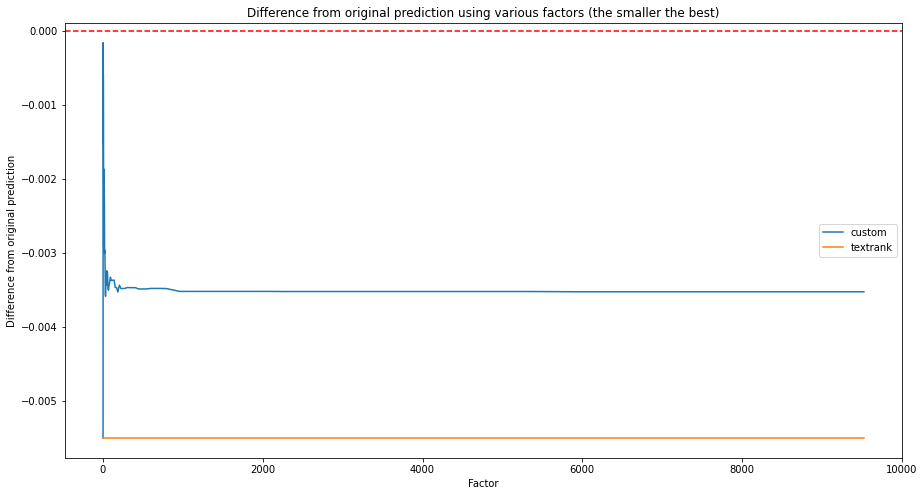

In [14]:
ax = pdf.plot(
    figsize=(15,8), 
    xlabel="Factor", 
    ylabel="Difference from original prediction", 
    fontsize=10, 
    title="Difference from original prediction using various factors (the smaller the best)"
);

ax.axhline(y=0, color='r', linestyle='--', label='vline1.5custom');

plt.show()

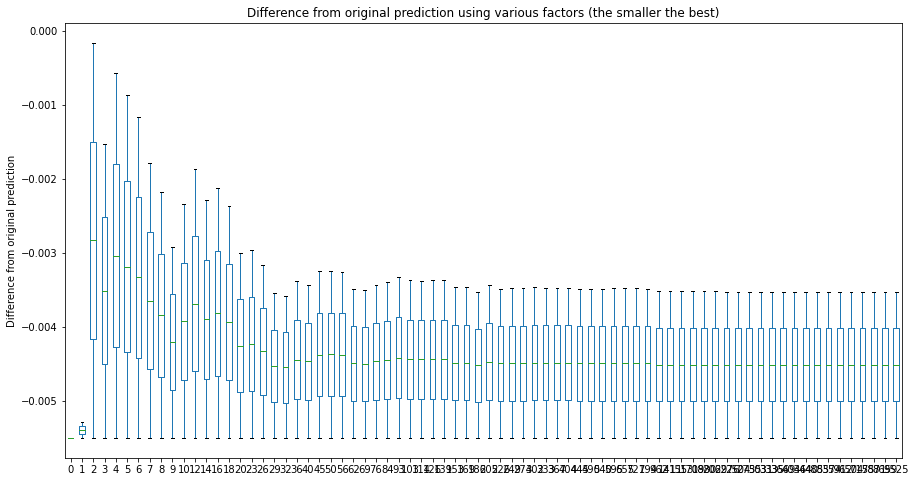

In [15]:
pdf.T.plot.box(
    figsize=(15,8), 
    xlabel="Factor", 
    ylabel="Difference from original prediction", 
    fontsize=10, 
    title="Difference from original prediction using various factors (the smaller the best)"
);

<AxesSubplot:>

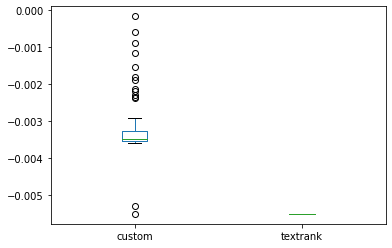

In [16]:
pdf.plot.box()

In [17]:
pdf.describe()

,custom,textrank
count,74.000000,74.000000
mean,-0.003195,-0.005502
std,0.000836,0.000000
min,-0.005502,-0.005502
25%,-0.003522,-0.005502
50%,-0.003480,-0.005502
75%,-0.003273,-0.005502
max,-0.000158,-0.005502
